# Gui Features in OpenCV

## Getting started with images

### Learning to load an image, display and save it back

In [35]:
import numpy as np
import cv2 as cv

#reading an image
img=cv.imread('PE-LD4.jpg', 0)

#showing the image, where cv.WINDOW_NORMAL is resizable window, by default i'ts cv.WINDOW_AUTOSIZE
#cv.namedWindow('4', cv.WINDOW_NORMAL)
cv.imshow('4', img)

k=cv.waitKey(0)
if k==27: #ESC key to exit
    cv.destroyAllWindows() 
elif k==ord('s'): #wait 's' key to save and exit
    cv.imwrite('4gray.png', img)
    cv.destroyAllWindows()


Second argument is a flag which specifies the way image should be read.

cv.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
cv.IMREAD_GRAYSCALE : Loads image in grayscale mode
cv.IMREAD_UNCHANGED : Loads image as such including alpha channel
Note
Instead of these three flags, you can simply pass integers 1, 0 or -1 respectively.

### Using Matplotlib

In [36]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

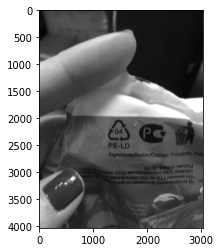

In [39]:
img = cv.imread('PE-LD4.jpg', 0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([]) #to hide tick values on x&y axis
plt.show()

## Extra notes 

### RGB

OpenCV follows BGR order, while matplotlib likely follows RGB order.

When you display an image loaded in OpenCV using pylab functions, you may need to convert it into RGB mode.

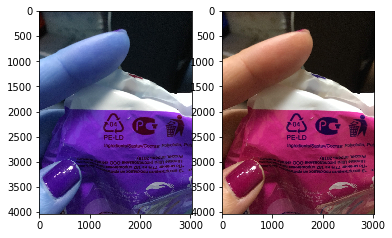

In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('PE-LD4.jpg')
b,g,r = cv.split(img)
img2 = cv.merge([r,g,b])
plt.subplot(121); plt.imshow(img)
plt.subplot(122); plt.imshow(img2)
plt.show()

cv.imshow('bgr image', img)
cv.imshow('rgb image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## More about matplotlib.pyplot 

https://matplotlib.org/api/pyplot_api.html

## Getting Started with Videos
### Capture Video from Camera

Let's capture a video from the camera (I am using the in-built webcam of my laptop), convert it into grayscale video and display it. 

In [49]:
import numpy as np 
import cv2 as cv

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
    
while True:
    #Capture frame by frame
    ret, frame = cap.read()
    
    #if frame is read correctly ret is True
    if not ret:
        print("Cannot receive frame (stream end?) Exiting ...")
        break
    #our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    #display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
        
cap.release()
cv.destroyAllWindows()

### Playing Video from file 

In [7]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('test3.mov')

while cap.isOpened():
    ret, frame = cap.read()
    
    #if frame is read correctly ret is true
    if not ret:
        print("Can't receive frame")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    cv.imshow('frame', gray)
    if cv.waitKey(1) ==ord('q'):
        break
        
cap.release()
cv.destroyAllWindows()

Notes: it doesn't receive the frame when with video test2 the length of which is only 2 sec

### Saving video 

We will capture from a Camera, flip every frame in vertcal direction and save it.

In [11]:
import numpy as np
import cv2 as cv

#vreate a VideoCapture object
cap = cv.VideoCapture(0)

#Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame")
        break
   # frame = cv.flip(frame, 0)
    
    #write the flipped frame
    out.write(frame)
    
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
        
#release
cap.release()
out.release()
cv.destroyAllWindows()

## Drawing functions 

In [20]:
import numpy as np
import cv2 as cv

img = np.zeros((512, 512, 3), np.uint8)
cv.line(img, (0,0),(511, 511), (255, 0, 0), 5)
cv.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)
cv.circle(img, (447, 63), 63, (0, 0, 255), -1)
cv.ellipse(img, (256, 256), (100, 50), 0, 0, 180, 255, -1)

pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv.polylines(img, [pts], True, (0, 255, 255))

#adding text
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 2, cv.LINE_AA)

cv.imshow('draw', img)
cv.waitKey(0)
cv.destroyAllWindows()


### Mouse as a Paint-Brush 

Learn to handle mouse events in OpenCV.
You will learn these functions : cv.setMouseCallback()

we create a simple application which draws a circle on an image wherever we double-click on it.

In [21]:
import cv2 as cv
events = [i for i in dir(cv) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']
